# Data Preprocessing

## Importing Libraries

In [1]:
# install libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install networkx
!pip install nltk
!pip install scipy
!pip install pyvis

# things to do:
# add all character names and aliases
# change names to darrow-red, etc.
# add other books from first series.  In second series, break books up by chapter ("I" changes based on narrator)
# add books from second series
# When making graph, remove all nodes with no edges

In [2]:
#Library catalogue
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import networkx as nx
import re
import math

from pyvis.network import Network

import matplotlib.pyplot as plt
import scipy.stats as stats
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk, pos_tag

nltk.download('maxent_ne_chunker')

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

#--NotebookApp.iopub_data_rate_limit=1.0e10


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Logan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Logan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Logan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Logan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Importing Book 1

In [3]:
with open('rr.txt', 'r', encoding = 'utf-8') as rr:
  rr_text = rr.read()

## Clean Book

In [4]:
# Remove joined words
def remove_joined_words(text):
    # Remove words with hex codes and forward slashes
    cleaned_text = re.sub(r'\w*\\x\w*|\w*\/\w*', '', text)
    return cleaned_text


# Remove joined words with hex codes and forward slashes
cleaned_rr_text = remove_joined_words(rr_text)

## Manually identify characters

In [5]:
def preprocess_names(text, name_mapping):
  for variation, actual_name in name_mapping.items():
    text = text.replace(variation, actual_name)
  return text

name_mapping = {
    # main characters
    "Mustang": "virginia-gold",
    "Darrow": "darrow-red",
    "Reaper": "darrow-red",
    "Andromedus": "darrow-red",
    "Cassius au Bellona": "cassius-gold",
    "Cassius": "cassius-gold",
    "Sovereign": "octavia-lune",

    # Other misc:
    "Timony": "timony-copper",
    "Bondilus": "bondilus-copper",
    "Mickey": "mickey-violet",
    "Evey": "evey-pink",
    "Matteo": "matteo-pink",
    "Dan": "dan-grey",
    "Lune": "octavia-gold",
    "Octavia": "octavia-gold",
    "Barlow": "barlow-red",
    "Eo": "eo-red",
    "Harmony": "harmony-red",
    "Uncle Narol": "narol-red",
    "Narol": "narol-red",
    "Dio": "dio-red",
    "Leanna": "leanna-red",
    "Dago": "dago-gamma",
    "Dain": "dain-red",
    "Dale": "dale-red",
    "Dancer": "dancer-red",
    "Kora": "kora-red",
    "Iro": "iro-red",
    "Kieran": "kieran-red",
    "Liam": "liam-red",
    "Loran": "loran-red",
    "Reagan": "reagan-red",
    "Ralph": "ralph-red",
    "Varlo": "varlo-red",

    # Other golds:
    "Antonia au Severus-Julii": "antonia-julii",
    "Antonia": "antonia-julii",
    "Arria": "arria-gold",
    "Cassandra": "cassandra-gold",
    "Cipio": "cipio-gold",
    "Clintus": "clintus-gold",
    "Clown": "clown-gold",
    "Dax": "dax-gold",
    "Fitchner au Barca": "fitchner-barca",
    "Fitchner": "fitchner-barca",
    "Julian au Bellona": "julian-bellona",
    "Julian": "julian-bellona",
    "June": "june-gold",
    "Karnus": "karnus-bellona",
    "Lea": "lea-gold",
    "Lilath au Faran": "lilath-faran",
    "Lorn au Arcos": "lorn-arcos",
    "Lorn": "lorn-arcos",
    "Milia au Trachus": "milia-trachus",
    "Milia": "milia-trachus",
    "ArchGovernor Nero au Augustus": "nero-augustus",
    "Nero au Augustus": "nero-augustus",
    "Nero": "nero-augustus",
    "ArchGovernor": "nero-augustus",
    "Nexus au Celintus": "nexus-celintus",
    "Nexus": "nexus-celintus",
    "Nyla": "nyla-gold",
    "Screwface": "screwface-gold",
    "Sevro au Barca": "sevro-barca",
    "Sevro": "sevro-barca",
    "Tactus au Valii-Rath": "tactus-rath",
    "Tactus": "tactus-rath",
    "Tamara": "tamara-gold",
    "Tiberius": "tiberius-gold",
    "The Jackal": "adrius-augustus",
    "Jackal": "adrius-augustus",
    "Adrius": "adrius-augustus",
    "Thistle": "thistle-gold",
    "Titus au Ladros": "titus-ladros",
    "Titus": "titus-ladros",
    "Pax au Telemanus": "pax-telemanus",
    "Pax": "pax-telemanus",
    "Pebble": "pebble-gold",
    "Pollux": "pollux-gold",
    "Priam au Caan": "priam-gold",
    "Priam": "priam-gold",
    "Proctor Apollo": "apollo-gold",
    "Proctor Bacchus": "bacchus-gold",
    "Proctor Ceres": "ceres-gold",
    "Proctor Diana": "diana-gold",
    "Proctor Juno": "juno-gold",
    "Proctor Jupiter": "jupiter-gold",
    "Proctor Mars": "fitchner-barca",
    "Proctor Mercury": "mercury-gold",
    "Proctor Pluto": "pluto-gold",
    "Proctor Venus": "venus-gold",
    "Quinn": "quinn-gold",
    "Roque au Fabii": "roque-gold",
    "Roque": "roque-gold",
    "Vixus au Sarna": "vixus-sarna",
    "Vixus": "vixus-sarna",
    "Weed": "weed-gold",
    " I ": "darrow-red"
}

# Preprocess the text
processed_text = preprocess_names(cleaned_rr_text, name_mapping)

## Tokenize book

In [6]:
rr_sentences = sent_tokenize(processed_text)
rr_words = [word_tokenize(rr_sentence) for rr_sentence in rr_sentences]
tagged_words = [pos_tag(rr_word_list) for rr_word_list in rr_words]

## Identify and list characters

In [7]:
# Perform named entity recognition and extract characters
characters = []
for tagged_sentence in tagged_words:
    named_entities = ne_chunk(tagged_sentence)
    for entity in named_entities:
        if isinstance(entity, nltk.Tree) and entity.label() == 'PERSON':
            characters.append(' '.join([leaf[0] for leaf in entity]))

In [8]:
# Manually list characters
characters = ["darrow-red", "virginia-augustus", "cassius-bellona", "octavia-lune", "timony-podginus", "bondilus-copper", "mickey-carver",
               "evey-pink", "matteo-pink", "ugly-dan", "barlow-red", "eo-red", "harmony-red", "narol-red", "dio-red", "leanna-red",
               "dago-gamma", "dain-red", "dale-red", "dancer-red", "kora-red", "iro-red", "kieran-red", "liam-red", "loran-red",
               "reagan-red", "ralph-red", "varlo-red", "antonia-julii", "arria-gold", "cassandra-gold", "cipio-gold", "clintus-gold",
               "clown-gold", "dax-gold", "fitchner-barca", "julian-bellona", "june-gold", "karnus-bellona", "lea-gold", "lilath-faran",
               "lorn-arcos", "milia-trachus", "nero-augustus", "nexus-celintus", "nyla-gold", "screwface-gold", "sevro-barca", "tactus-rath",
               "tamara-gold", "tiberius-gold", "adrius-augustus", "thistle-gold", "titus-ladros", "pax-telemanus", "pebble-gold", "priam-gold",
               "apollo-gold", "bacchus-gold", "ceres-gold", "diana-gold", "juno-gold", "jupiter-gold", "mercury-gold", "pluto-gold", "venus-gold",
               "quinn-gold", "roque-gold", "vixus-sarna", "weed-gold"

]

In [9]:
for character in characters:
  print(character)

darrow-lykos
virginia-augustus
cassius-bellona
octavia-lune
timony-podginus
bondilus-copper
mickey-carver
evey-pink
matteo-pink
ugly-dan
barlow-lykos
eo-lykos
harmony-red
narol-lykos
dio-lykos
leanna-lykos
dago-gamma
dain-lykos
dale-lykos
dancer-red
kora-lykos
iro-lykos
kieran-lykos
liam-lykos
loran-lykos
reagan-red
ralph-red
varlo-red
antonia-julii
arria-gold
cassandra-gold
cipio-gold
clintus-gold
clown-gold
dax-gold
fitchner-barca
julian-bellona
june-gold
karnus-bellona
lea-gold
lilath-faran
lorn-arcos
milia-trachus
nero-augustus
nexus-celintus
nyla-gold
screwface-gold
sevro-barca
tactus-rath
tamara-gold
tiberius-gold
adrius-augustus
thistle-gold
titus-ladros
pax-telemanus
pebble-gold
priam-gold
apollo-gold
bacchus-gold
ceres-gold
diana-gold
juno-gold
jupiter-gold
mercury-gold
pluto-gold
venus-gold
quinn-gold
roque-gold
vixus-sarna
weed-gold


## Create edges between characters

In [10]:
character_mentions = {char: [] for char in characters}

# Step 2: Iterate through tagged_words and count individual character mentions
for i, sentence in enumerate(tagged_words):
    token_count = 0
    for word, tag in sentence:
        for char in characters:
            if char.lower() in word.lower():  # Case-insensitive check
                character_mentions[char].append((i, token_count))  # Store sentence index and token index
        token_count += 1


# Step 3: Count mentions within 15 tokens for each pair of characters
mention_counts = {f"{char1} and {char2}": 0 for i, char1 in enumerate(characters) for char2 in characters[i+1:]}

def count_mentions_within_distance(mentions1, mentions2, distance):
    count = 0
    for i1, j1 in mentions1:
        for i2, j2 in mentions2:
            if i1 == i2 and abs(j1 - j2) <= distance:
                count += 1
    return count

DISTANCE_THRESHOLD = 30
# Count mentions within distance=15 tokens for each pair of characters
for i in range(len(characters)):
    for j in range(i + 1, len(characters)):
        char1 = characters[i]
        char2 = characters[j]
        mentions1 = character_mentions[char1]
        mentions2 = character_mentions[char2]

        mention_count = count_mentions_within_distance(mentions1, mentions2, DISTANCE_THRESHOLD)
        mention_counts[f"{char1} and {char2}"] = mention_count

# Sort mention_counts in descending order by count
sorted_mention_counts = dict(sorted(mention_counts.items(), key=lambda item: item[1], reverse=True))


# Count the number of times each character is mentioned
character_mentions_count = {char: len(mentions) for char, mentions in character_mentions.items()}

# Create a dict that contains the size for each node
# use log to prevent skewing in sizes
node_sizes = {char: np.log(count+1)*500 for char, count in character_mentions_count.items()} 

In [11]:
print(character_mentions_count)

{'darrow-lykos': 3550, 'virginia-augustus': 247, 'cassius-bellona': 331, 'octavia-lune': 26, 'timony-podginus': 1, 'bondilus-copper': 1, 'mickey-carver': 76, 'evey-pink': 13, 'matteo-pink': 42, 'ugly-dan': 137, 'barlow-lykos': 10, 'eo-lykos': 182, 'harmony-red': 66, 'narol-lykos': 38, 'dio-lykos': 9, 'leanna-lykos': 8, 'dago-gamma': 10, 'dain-lykos': 1, 'dale-lykos': 1, 'dancer-red': 0, 'kora-lykos': 0, 'iro-lykos': 4, 'kieran-lykos': 25, 'liam-lykos': 1, 'loran-lykos': 25, 'reagan-red': 1, 'ralph-red': 5, 'varlo-red': 1, 'antonia-julii': 77, 'arria-gold': 2, 'cassandra-gold': 19, 'cipio-gold': 6, 'clintus-gold': 5, 'clown-gold': 11, 'dax-gold': 6, 'fitchner-barca': 96, 'julian-bellona': 70, 'june-gold': 7, 'karnus-bellona': 3, 'lea-gold': 68, 'lilath-faran': 0, 'lorn-arcos': 4, 'milia-trachus': 46, 'nero-augustus': 57, 'nexus-celintus': 1, 'nyla-gold': 22, 'screwface-gold': 7, 'sevro-barca': 193, 'tactus-rath': 79, 'tamara-gold': 14, 'tiberius-gold': 3, 'adrius-augustus': 117, 'thistl

## Define colours for characters

In [12]:
# manually define each character's colour

golds = ["virginia-augustus", "cassius-bellona", "octavia-lune", "antonia-julii", "arria-gold", "cassandra-gold", "cipio-gold", "clintus-gold","clown-gold", 
        "dax-gold", "fitchner-barca", "julian-bellona", "june-gold", "karnus-bellona", "lea-gold", "lilath-faran","lorn-arcos", "milia-trachus", "nero-augustus", 
        "nexus-celintus", "nyla-gold", "screwface-gold", "sevro-barca", "tactus-rath","tamara-gold", "tiberius-gold", "adrius-augustus", "thistle-gold", "titus-ladros", "pax-telemanus", "pebble-gold", "priam-gold",
               "apollo-gold", "bacchus-gold", "ceres-gold", "diana-gold", "juno-gold", "jupiter-gold", "mercury-gold", "pluto-gold", "venus-gold",
               "quinn-gold", "roque-gold", "vixus-sarna", "weed-gold"]
reds = ["darrow-red", "barlow-red", "eo-red", "harmony-red", "narol-red", "dio-red", "leanna-red","dago-red", "dain-red", "dale-red", "dancer-red", "kora-red", "iro-red", "kieran-red", "liam-red", "loran-red", 
        "reagan-red", "ralph-red", "varlo-red"]
coppers = ["timony-podginus", "bondilus-copper"]
greys = ["ugly-dan"]
pinks = ["evey-pink", "matteo-pink"]
violets = ["mickey-carver"]


## Set graph properties

In [30]:
# Draw graph

# Create a graph
G = nx.Graph()

# Add nodes for characters with sizes
for char, size in node_sizes.items():
    G.add_node(char, size=size)

# Add edges with weights based on mention counts
for pair, count in sorted_mention_counts.items():
    char1, char2 = pair.split(" and ")
    # ensure > 2 connections exist for each pair UNLESS one of the characters has < 5 mentions
    if (count > 2) or (count > 0 and (character_mentions_count[char1] < 5 or character_mentions_count[char2] < 5)):
        G.add_edge(char1, char2, weight=count)

# create dict of colours for each character
node_colours = {}
for char in characters:
    if char in golds:
        node_colours[char] = "gold"
    elif char in reds:
        node_colours[char] = "red"
    elif char in coppers:
        node_colours[char] = "orange"
    elif char in greys:
        node_colours[char] = "grey"
    elif char in pinks:
        node_colours[char] = "pink"
    elif char in violets:
        node_colours[char] = "violet"
    else:
        node_colours[char] = "blue"

# get and normalize edge weights with log scale
edge_weights = nx.get_edge_attributes(G, "weight").values()
edge_weights = np.array(list(edge_weights))
edge_weights = np.log(edge_weights+1)



## Draw graph with nx

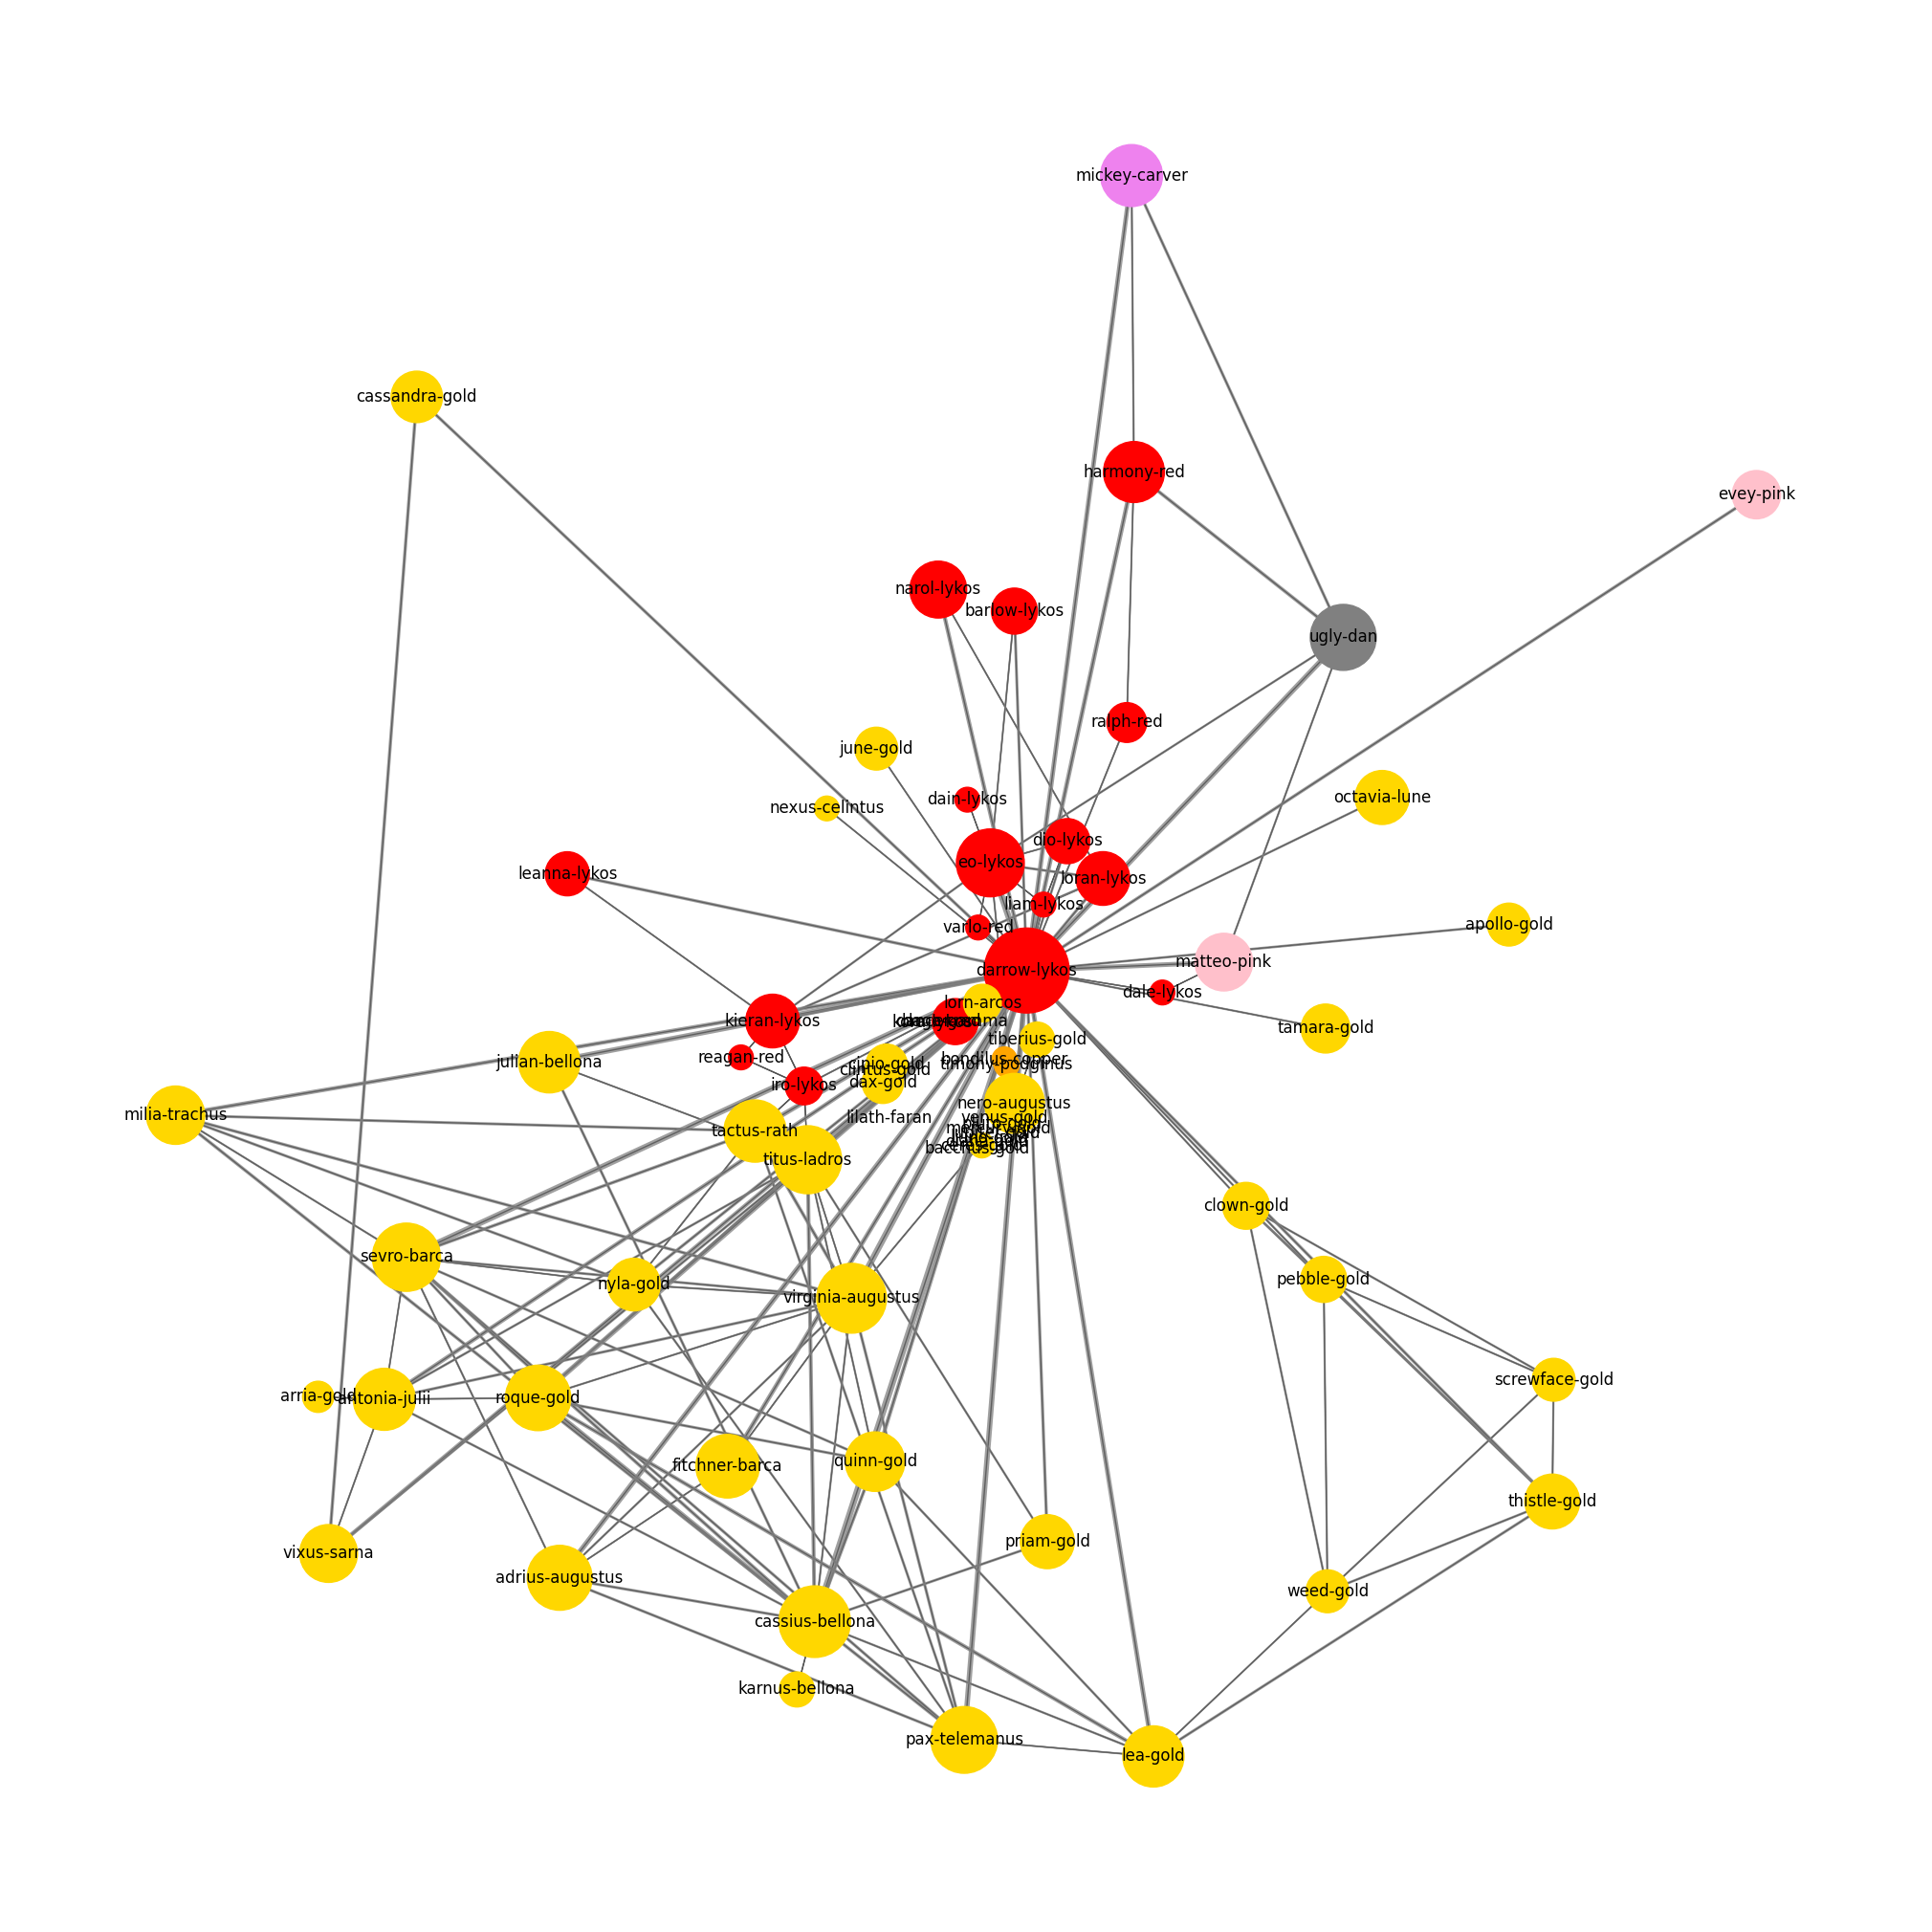

In [31]:

# Draw the graph
pos = nx.kamada_kawai_layout(G)  # Layout algorithm
plt.figure(figsize=(20, 20))  # Size of figure
nx.draw(G, pos, node_size=[size for size in node_sizes.values()], node_color=[colour for colour in node_colours.values()], with_labels=True)

nx.draw_networkx_edges(G, pos, width=list(edge_weights), alpha=0.75, edge_color="grey")


## Create interactive graph with pyvis

In [32]:
G_two = G.copy()
# remove node sizes
for node in G_two.nodes():
    G_two.nodes[node].pop('size', None)
    # set colour
    G_two.nodes[node]["color"] = node_colours[node]

# normalize edge weights
edge_weights = nx.get_edge_attributes(G_two, "weight").values()
edge_weights = np.array(list(edge_weights))
edge_weights = np.log(edge_weights+1)
nx.set_edge_attributes(G_two, dict(zip(G_two.edges(), edge_weights)), "weight")


# create network and send to html
net = Network(
    directed=False,
    select_menu=True,
    filter_menu=True,
    notebook=True,
)
net.show_buttons()
net.from_nx(G_two)
net.show("RR-network.html")

RR-network.html


# Compute Network Statistics

In [16]:
# Centrality
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_two, weight="weight")
betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))
for char, score in betweenness_centrality.items():
    print(f"{char}: {score}")


darrow-lykos: 0.32033654041326676
thistle-gold: 0.009311188243413307
clown-gold: 0.008472881906385742
pebble-gold: 0.008472881906385742
lea-gold: 0.008163337798887673
virginia-augustus: 0.00726058539357772
cassius-bellona: 0.004366601713149027
sevro-barca: 0.003239556692242114
eo-lykos: 0.0029838022165387893
titus-ladros: 0.002514919011082694
pax-telemanus: 0.0017339544513457557
ugly-dan: 0.0010656436487638534
roque-gold: 0.0009281248731376608
weed-gold: 0.0008383063370275647
antonia-julii: 0.0007104290991759021
adrius-augustus: 0.0005115089514066496
harmony-red: 0.00042625745950554135
kieran-lykos: 0.00042625745950554135
loran-lykos: 0.00042625745950554135
vixus-sarna: 0.00042625745950554135
quinn-gold: 0.0003770348719197824
nero-augustus: 0.00021312872975277067
octavia-lune: 0.0
timony-podginus: 0.0
bondilus-copper: 0.0
mickey-carver: 0.0
evey-pink: 0.0
matteo-pink: 0.0
barlow-lykos: 0.0
narol-lykos: 0.0
dio-lykos: 0.0
leanna-lykos: 0.0
dago-gamma: 0.0
dain-lykos: 0.0
dale-lykos: 0.0

In [17]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G_two, weight="weight")
eigenvector_centrality = dict(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))
for char, score in eigenvector_centrality.items():
    print(f"{char}: {score}")

darrow-lykos: 0.5075708139181804
virginia-augustus: 0.2931802561467923
sevro-barca: 0.27052156320206455
cassius-bellona: 0.25646299861681204
roque-gold: 0.21984396461518135
titus-ladros: 0.20832963315564887
pax-telemanus: 0.20451237015676058
antonia-julii: 0.19785207112023942
adrius-augustus: 0.17401514433931678
quinn-gold: 0.17263449945871664
milia-trachus: 0.1723774358539856
nyla-gold: 0.1723774358539856
tactus-rath: 0.1723774358539856
lea-gold: 0.1602226230959769
eo-lykos: 0.10449849638850194
vixus-sarna: 0.10411799873256325
fitchner-barca: 0.1036866202160317
julian-bellona: 0.10343120603507329
priam-gold: 0.10343120603507329
thistle-gold: 0.09701732777017363
nero-augustus: 0.09629250830450534
ugly-dan: 0.08770553550117888
clown-gold: 0.08161280339667651
pebble-gold: 0.08161280339667651
kieran-lykos: 0.08030067590340954
loran-lykos: 0.08030067590340954
harmony-red: 0.07755458472843409
mickey-carver: 0.07157040160388858
barlow-lykos: 0.0651069761890754
dio-lykos: 0.0651069761890754
c

In [18]:
# Degree centrality
degree_centrality = nx.degree_centrality(G_two)
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
for char, score in degree_centrality.items():
    print(f"{char}: {score}")

darrow-lykos: 0.5942028985507246
virginia-augustus: 0.18840579710144928
cassius-bellona: 0.15942028985507248
sevro-barca: 0.15942028985507248
titus-ladros: 0.13043478260869565
pax-telemanus: 0.11594202898550725
roque-gold: 0.11594202898550725
eo-lykos: 0.10144927536231885
antonia-julii: 0.10144927536231885
lea-gold: 0.10144927536231885
milia-trachus: 0.08695652173913043
nyla-gold: 0.08695652173913043
tactus-rath: 0.08695652173913043
adrius-augustus: 0.08695652173913043
thistle-gold: 0.08695652173913043
quinn-gold: 0.08695652173913043
ugly-dan: 0.07246376811594203
clown-gold: 0.07246376811594203
pebble-gold: 0.07246376811594203
weed-gold: 0.07246376811594203
harmony-red: 0.057971014492753624
kieran-lykos: 0.057971014492753624
loran-lykos: 0.057971014492753624
screwface-gold: 0.057971014492753624
vixus-sarna: 0.057971014492753624
mickey-carver: 0.043478260869565216
fitchner-barca: 0.043478260869565216
julian-bellona: 0.043478260869565216
nero-augustus: 0.043478260869565216
priam-gold: 0.

In [19]:
# Closeness centrality
closeness_centrality = nx.closeness_centrality(G_two)
closeness_centrality = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for char, score in closeness_centrality.items():
    print(f"{char}: {score}")

darrow-lykos: 0.5954911433172303
virginia-augustus: 0.3572946859903382
cassius-bellona: 0.35259344012204424
sevro-barca: 0.34801430453604365
lea-gold: 0.3392038158136122
titus-ladros: 0.3392038158136122
pax-telemanus: 0.3392038158136122
roque-gold: 0.3392038158136122
thistle-gold: 0.33496376811594203
eo-lykos: 0.3308284129540168
antonia-julii: 0.3308284129540168
clown-gold: 0.3308284129540168
pebble-gold: 0.3308284129540168
quinn-gold: 0.3308284129540168
milia-trachus: 0.3267939201131142
nyla-gold: 0.3267939201131142
tactus-rath: 0.3267939201131142
adrius-augustus: 0.3267939201131142
ugly-dan: 0.32285664396717306
harmony-red: 0.3190131124913733
kieran-lykos: 0.3190131124913733
loran-lykos: 0.3190131124913733
vixus-sarna: 0.3190131124913733
mickey-carver: 0.3152600170502984
fitchner-barca: 0.3152600170502984
julian-bellona: 0.3152600170502984
nero-augustus: 0.3152600170502984
priam-gold: 0.3152600170502984
matteo-pink: 0.3115942028985507
barlow-lykos: 0.3115942028985507
narol-lykos: 0.3

In [20]:
# get top 10 characters from all centrality measures combined and normalized
top_10 = []
# set normalizing factors
betweenness_normalizing_factor = max(betweenness_centrality.values())
eigenvector_normalizing_factor = max(eigenvector_centrality.values())
degree_normalizing_factor = max(degree_centrality.values())
closeness_normalizing_factor = max(closeness_centrality.values())

for char in characters:
    score = (betweenness_centrality[char]/betweenness_normalizing_factor + eigenvector_centrality[char]/eigenvector_normalizing_factor + degree_centrality[char]/degree_normalizing_factor + closeness_centrality[char]/closeness_normalizing_factor)/4
    top_10.append((char, score))
top_10 = sorted(top_10, key=lambda item: item[1], reverse=True)[:20]
for char, score in top_10:
    print(f"{char}: {score}")


darrow-lykos: 1.0
virginia-augustus: 0.3793382879289067
sevro-barca: 0.3489485732951231
cassius-bellona: 0.3448261367862733
titus-ladros: 0.3018569456111624
roque-gold: 0.30019229722619767
pax-telemanus: 0.2932697342900633
antonia-julii: 0.2795767320632493
lea-gold: 0.2703752865200627
quinn-gold: 0.26079826451508237
adrius-augustus: 0.2598894708234718
milia-trachus: 0.25868363389168825
nyla-gold: 0.25868363389168825
tactus-rath: 0.25868363389168825
eo-lykos: 0.23537037216110981
thistle-gold: 0.2322622087283369
clown-gold: 0.21618692092265823
pebble-gold: 0.21618692092265823
ugly-dan: 0.2100603025793094
vixus-sarna: 0.20993397796659286
